In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.output {font-size:10pt}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
</style>
"""))

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = []

for i in range(50):
    data.append([random.randint(40,70), random.randint(140,180)])
    data.append([random.randint(60,90), random.randint(170,200)])

In [5]:
# 여자 
for female in data[0:100:2]:
    print(female, end=" ")
print('\n-----------------------------------------------------------')

# 남자 
for male in data[1:100:2]:
    print(male, end=' ')

[62, 159] [43, 156] [63, 165] [45, 153] [50, 141] [45, 146] [40, 160] [53, 153] [53, 163] [56, 164] [68, 167] [59, 140] [63, 158] [43, 141] [60, 150] [61, 143] [46, 148] [40, 162] [69, 141] [49, 160] [50, 174] [60, 149] [63, 154] [62, 140] [56, 169] [61, 176] [69, 170] [60, 156] [64, 152] [47, 145] [58, 163] [70, 150] [67, 154] [50, 173] [42, 170] [58, 142] [55, 157] [70, 164] [56, 145] [48, 155] [47, 166] [59, 178] [59, 168] [67, 158] [48, 165] [56, 178] [69, 140] [59, 163] [49, 158] [61, 167] 
-----------------------------------------------------------
[80, 179] [64, 183] [76, 171] [72, 198] [66, 173] [81, 176] [90, 186] [90, 185] [80, 180] [68, 184] [85, 180] [85, 194] [78, 197] [80, 174] [90, 186] [80, 197] [83, 177] [79, 172] [89, 200] [64, 173] [75, 178] [75, 196] [61, 176] [77, 200] [74, 184] [75, 189] [71, 179] [89, 174] [75, 195] [90, 186] [87, 171] [81, 187] [78, 184] [82, 198] [72, 170] [87, 187] [86, 187] [65, 197] [71, 186] [61, 183] [85, 184] [60, 184] [86, 184] [62, 192]

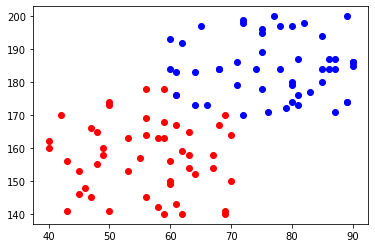

In [8]:
# 여자 몸무게 
[d[0] for d in data[0:100:2]]
# 여자 키 
[d[1] for d in data[0:100:2]]

# 남자 몸무게
[d[0] for d in data[1:100:2]]
# 남자 키
[d[1] for d in data[1:100:2]]

plt.plot([d[0] for d in data[0:100:2]], [d[1] for d in data[0:100:2]],
         'o', color='r')
plt.plot([d[0] for d in data[1:100:2]], [d[1] for d in data[1:100:2]],
         'o', color='b')

In [9]:
# 초기 랜덤 지점 2개 
random_points = [[random.randint(40,90), random.randint(140,200)],
                 [random.randint(40,90), random.randint(140,200)]]
print('초기 랜덤 기준점: ', random_points)

초기 랜덤 기준점:  [[42, 177], [63, 198]]


In [11]:
# 기준점 1 
print(random_points[0][0], random_points[0][1], end=' / ')
# 기준점 2 
print(random_points[1][0], random_points[1][1])

42 177 / 63 198


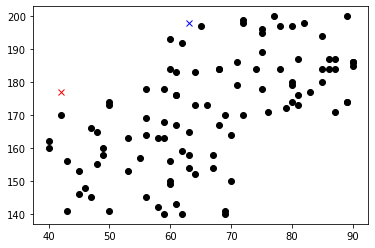

In [12]:
for x in data:
    plt.plot(x[0], x[1], 'o', color='k')

plt.plot(random_points[0][0], random_points[0][1], 'x', color='r')
plt.plot(random_points[1][0], random_points[1][1], 'x', color='b')

In [13]:
# 두 영역으로 나눌 빈 리스트 생성 
group1 = []
group2 = []

In [15]:
# 영역을 나누기 위한, 두 점 사이의 거리를 구하는 함수 
# (피타고라스의 정의 이용)
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [16]:
a = [0,0]; b = [3,4]
dist(a, b)

5.0

In [17]:
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d) # 기준점1과 더 가까운 그룹 
    else: 
        group2.append(d) # 기준점2과 더 가까운 그룹 

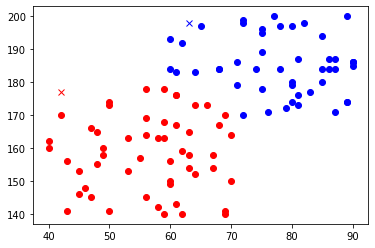

In [18]:
# 랜덤 기준점1,2를 기준으로 형성된 새로운 영역을 그래프로 생성 
for d in group1:
    plt.plot(d[0], d[1], 'o', color='r')
for d in group2:
    plt.plot(d[0], d[1], 'o', color='b')

plt.plot(random_points[0][0], random_points[0][1], 'x', color='r')
plt.plot(random_points[1][0], random_points[1][1], 'x', color='b')

In [23]:
# 기준점 이동 
# 1) x축값끼리, y축값끼리 더하기
# 2) 새로운 기준점 생성 (group1, group2 각각의 중간값으로 )
sum_x = 0; sum_y = 0
for g in group1:
    sum_x += g[0] # x축 값 누적 
    sum_y += g[1] # y축 값 누적 
new_points = []
new_points.append([sum_x/len(group1), sum_y/len(group1)])

sum_x = 0; sum_y = 0;
for g in group2:
    sum_x += g[0] 
    sum_y += g[1] 
new_points.append([sum_x/len(group2), sum_y/len(group2)])

print(random_points)
print(new_points)

[[42, 177], [63, 198]]
[[56.58490566037736, 158.32075471698113], [78.1063829787234, 185.12765957446808]]


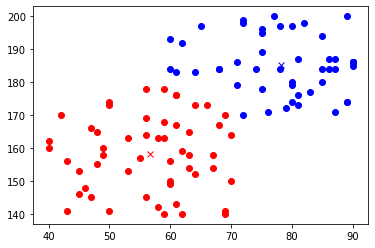

In [24]:
# 새로운 영역과 새로운 랜덤 기준점을 그래프로 시각화 
for d in group1:
    plt.plot(d[0], d[1], 'o', color='r')
for d in group2:
    plt.plot(d[0], d[1], 'o', color='b')

plt.plot(new_points[0][0], new_points[0][1], 'x', color='r')
plt.plot(new_points[1][0], new_points[1][1], 'x', color='b')

**전체 코드**

In [26]:
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

data = []
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,180)])
    data.append([random.randint(60,90), random.randint(170,200)])
new_points = [[random.randint(40,90), random.randint(140,200)],
              [random.randint(40,90), random.randint(140,200)]]
print('초기기준점 :',new_points)

for i in range(1,11):
    group1 = []
    group2 = []
    for d in data:
        if dist(new_points[0], d) < dist(new_points[1], d):
            group1.append(d)
        else:
            group2.append(d)

    sumX = 0; sumY = 0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    new_points = []
    new_points.append([sumX/len(group1), sumY/len(group1)])

    sumX = 0; sumY = 0
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    new_points.append([sumX/len(group2), sumY/len(group2)])
    print(i,'번째 기준 :', new_points)

초기기준점 : [[41, 168], [44, 200]]
1 번째 기준 : [[60.028985507246375, 163.02898550724638], [74.25806451612904, 190.58064516129033]]
2 번째 기준 : [[55.2037037037037, 159.24074074074073], [75.28260869565217, 186.04347826086956]]
3 번째 기준 : [[54.5, 158.75], [75.20833333333333, 185.45833333333334]]
4 번째 기준 : [[54.14, 158.16], [74.74, 184.98]]
5 번째 기준 : [[54.14, 158.16], [74.74, 184.98]]
6 번째 기준 : [[54.14, 158.16], [74.74, 184.98]]
7 번째 기준 : [[54.14, 158.16], [74.74, 184.98]]
8 번째 기준 : [[54.14, 158.16], [74.74, 184.98]]
9 번째 기준 : [[54.14, 158.16], [74.74, 184.98]]
10 번째 기준 : [[54.14, 158.16], [74.74, 184.98]]


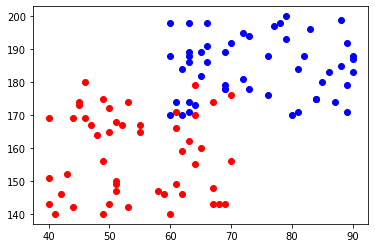

In [27]:
# 여자 몸무게
[d[0] for d in data[0:100:2] ]
# 여자 키
[d[1] for d in data[0:100:2] ]
# 남자 몸무게 
[d[0] for d in data[1:100:2] ]
# 남자 키
[d[1] for d in data[1:100:2] ]
plt.plot([d[0] for d in data[0:100:2] ], [d[1] for d in data[0:100:2] ], 'o', 
         color='r')
plt.plot([d[0] for d in data[1:100:2] ], [d[1] for d in data[1:100:2] ], 'o',
        color='b')

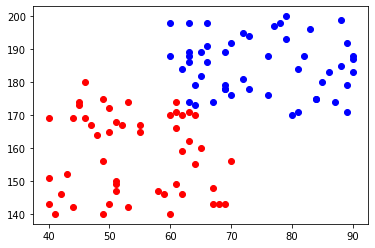

In [29]:
for g in group1:
    plt.plot(g[0], g[1], 'o', color='r')
for g in group2:
    plt.plot(g[0], g[1], 'o', color='b')